In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [14]:
data = pd.read_csv('assets/Wholesale Customers Data.csv')

In [15]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [17]:
features = data.columns[2:]
features

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data = pd.DataFrame(scaled_data, columns=features)
scaled_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


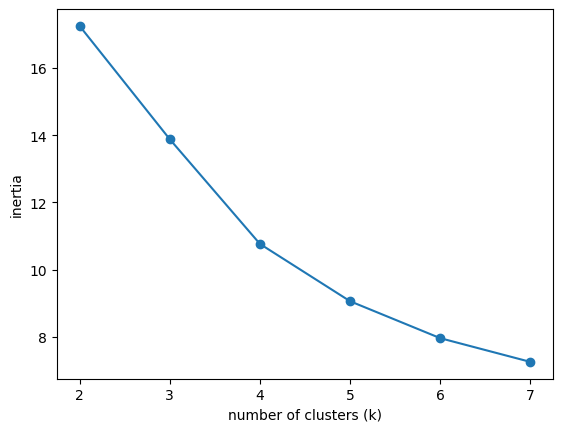

In [45]:
num_clusters = np.arange(2,8)
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

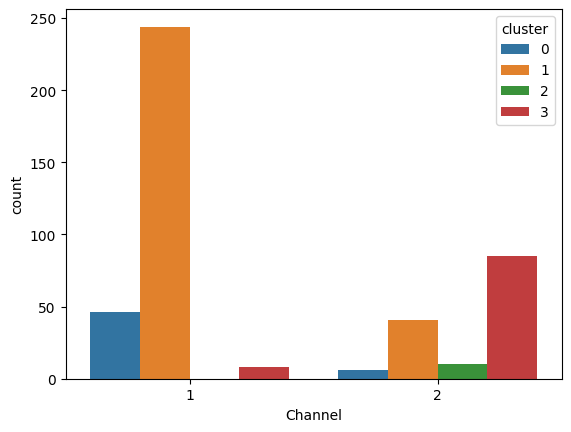

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)

scaled_data['cluster'] = kmeans.predict(scaled_data)
scaled_data['Channel'] = data['Channel']
sns.countplot(x='Channel', hue="cluster", data=scaled_data)
plt.show()

In [50]:
scaled_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster,Channel
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,1,2
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,1,2
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,1,2
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0,2


In [56]:
clusterDesc = scaled_data.iloc[:,:-1].groupby('cluster').mean().round(3)
clusterDesc.insert(0,'size',scaled_data['cluster'].value_counts())

In [57]:
clusterDesc

,size,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,
0,52,0.333,0.083,0.068,0.135,0.024,0.069
1,285,0.083,0.041,0.042,0.043,0.024,0.022
2,10,0.142,0.472,0.523,0.050,0.609,0.061
3,93,0.052,0.146,0.183,0.024,0.180,0.039
